In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [55]:
df = pd.read_csv('mall.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
# Check null values

df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [57]:
# Check data description

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Visualization

<AxesSubplot:>

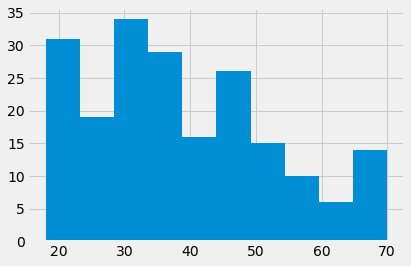

In [58]:
df['Age'].hist()

Our main audience are customers between 20 and 50

<AxesSubplot:>

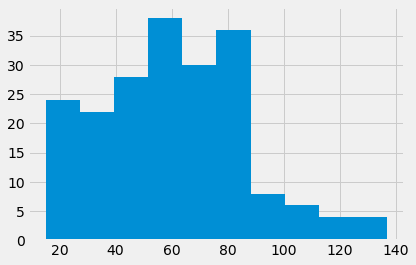

In [59]:
df['Annual Income (k$)'].hist()

We don't have many customers with incomes exceeding 80k, perhaps because they prefer other stores or because such a salary is substantial for our location.

<AxesSubplot:>

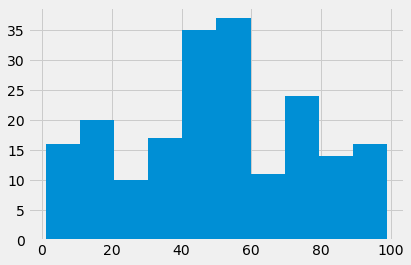

In [60]:
df['Spending Score (1-100)'].hist()

The majority of our customers exhibit a moderate spending score, falling between 40 and 60. This indicates that they are neither high nor low spenders.

## Clustering 

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



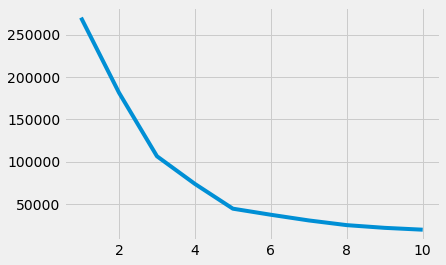

In [61]:
# Clustering by income and spending score
X = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++").fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)

I will choose 5 clusters

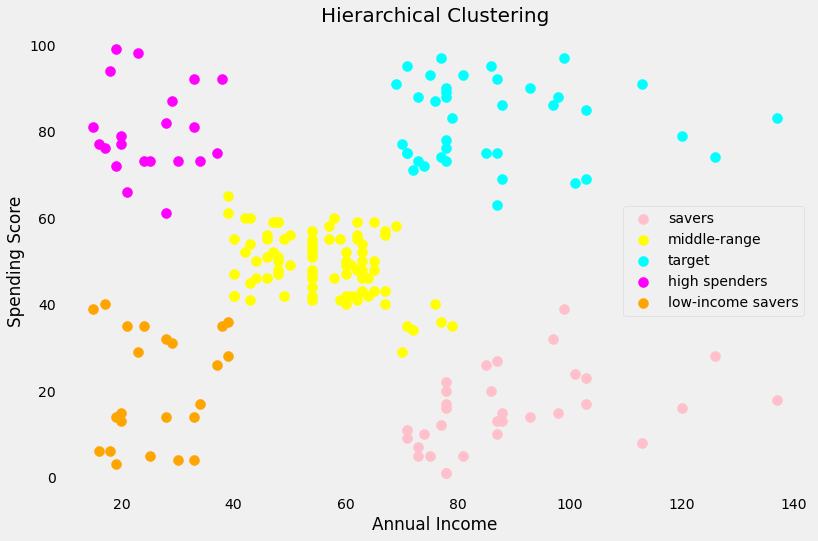

In [62]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
plt.figure(figsize=(12, 8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='pink', label='savers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='yellow', label='middle-range')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='cyan', label='target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='magenta', label='high spenders')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='orange', label='low-income savers')

plt.style.use('fivethirtyeight')
plt.title('Hierarchical Clustering', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



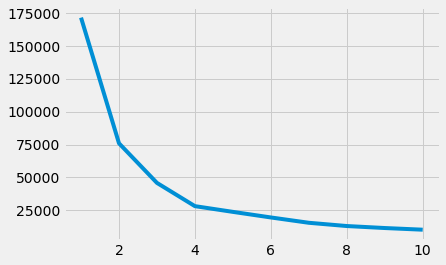

In [63]:
# Clustering by age and spending score

X = df.loc[:, ['Age', 'Spending Score (1-100)']].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++").fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)

I will choose 4 clusters

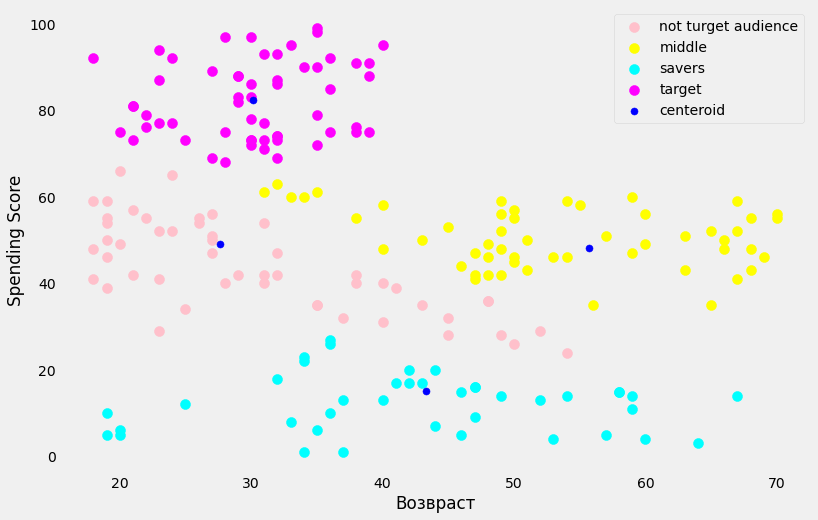

In [64]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
km = KMeans(n_clusters=4)
km.fit(X)
plt.figure(figsize=(12, 8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'pink', label = 'not turget audience')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'middle')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'cyan', label = 'savers')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'magenta', label = 'target')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.xlabel('Возвраст')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [68]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import pandas as pd

# Initialize Plotly in notebook mode
init_notebook_mode(connected=True)

# Assuming df is your DataFrame with the necessary columns
# Replace this with your actual DataFrame loading code if needed
# For example: df = pd.read_csv('your_data.csv')

# Example DataFrame structure for clarity
# df = pd.DataFrame({
#     'Age': [19, 21, 20, 23, 31],
#     'Spending Score (1-100)': [39, 81, 6, 77, 40],
#     'Annual Income (k$)': [15, 16, 17, 18, 19]
# })

# Perform KMeans clustering
X = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(X)
labels = km.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Create the 3D scatter plot
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['Cluster'],
        size=10,
        line=dict(
            color=df['Cluster'],
            width=12
        ),
        opacity=0.8
    )
)

# Prepare the data for the plot
plot_data = [trace1]

# Define the layout
layout = go.Layout(
    title='Age vs Spending Score vs Annual Income',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)

# Create the figure
fig = go.Figure(data=plot_data, layout=layout)

# Plot the figure
py.iplot(fig)

In [67]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
